# Demo for d_mg5_data.py

### Setup

In [2]:
import d_mg5_data
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

channels = ["VzToZhToVevebb", "VzToQCD", "VzToTt"]
fatjet_events = [d_mg5_data.FatJetEvents(channel, check_hdf5=False) for channel in channels]


DataLog: Successfully create VzToZhToVevebb with 246300 events.


DataLog: Successfully create VzToQCD with 241467 events.


DataLog: Successfully create VzToTt with 239866 events.



### Particles/Anti-Particles distribution of events

Plot the constituent in pie chart for each channel.

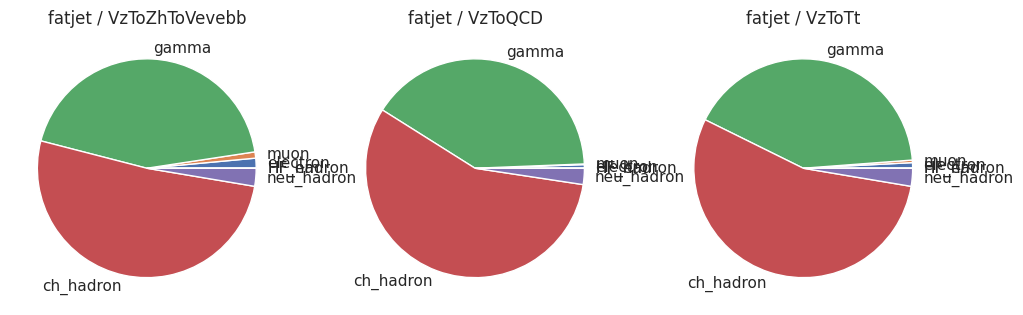

In [3]:
fig, ax     = plt.subplots(1, len(channels), figsize=(4*len(channels), 2*4), facecolor="white")
pdgid_table = d_mg5_data.pdgid_table
pdgid_keys  = pdgid_table.keys()

def draw_constituent(single_ax, events):
    x = [ak.sum(np.abs(events[f"fatjet_daughter_pid"]) == pdgid_table[key]) for key in pdgid_keys]
    single_ax.pie(x=x, labels=pdgid_keys)

for i in range(len(channels)):
    draw_constituent(ax[i], fatjet_events[i].events)
    ax[i].set_title(f"fatjet / {channels[i]}")

### Pt, eta, phi distribution of jets or fatjets

Plot `Pt`, `eta`, `phi` of individual fatjet

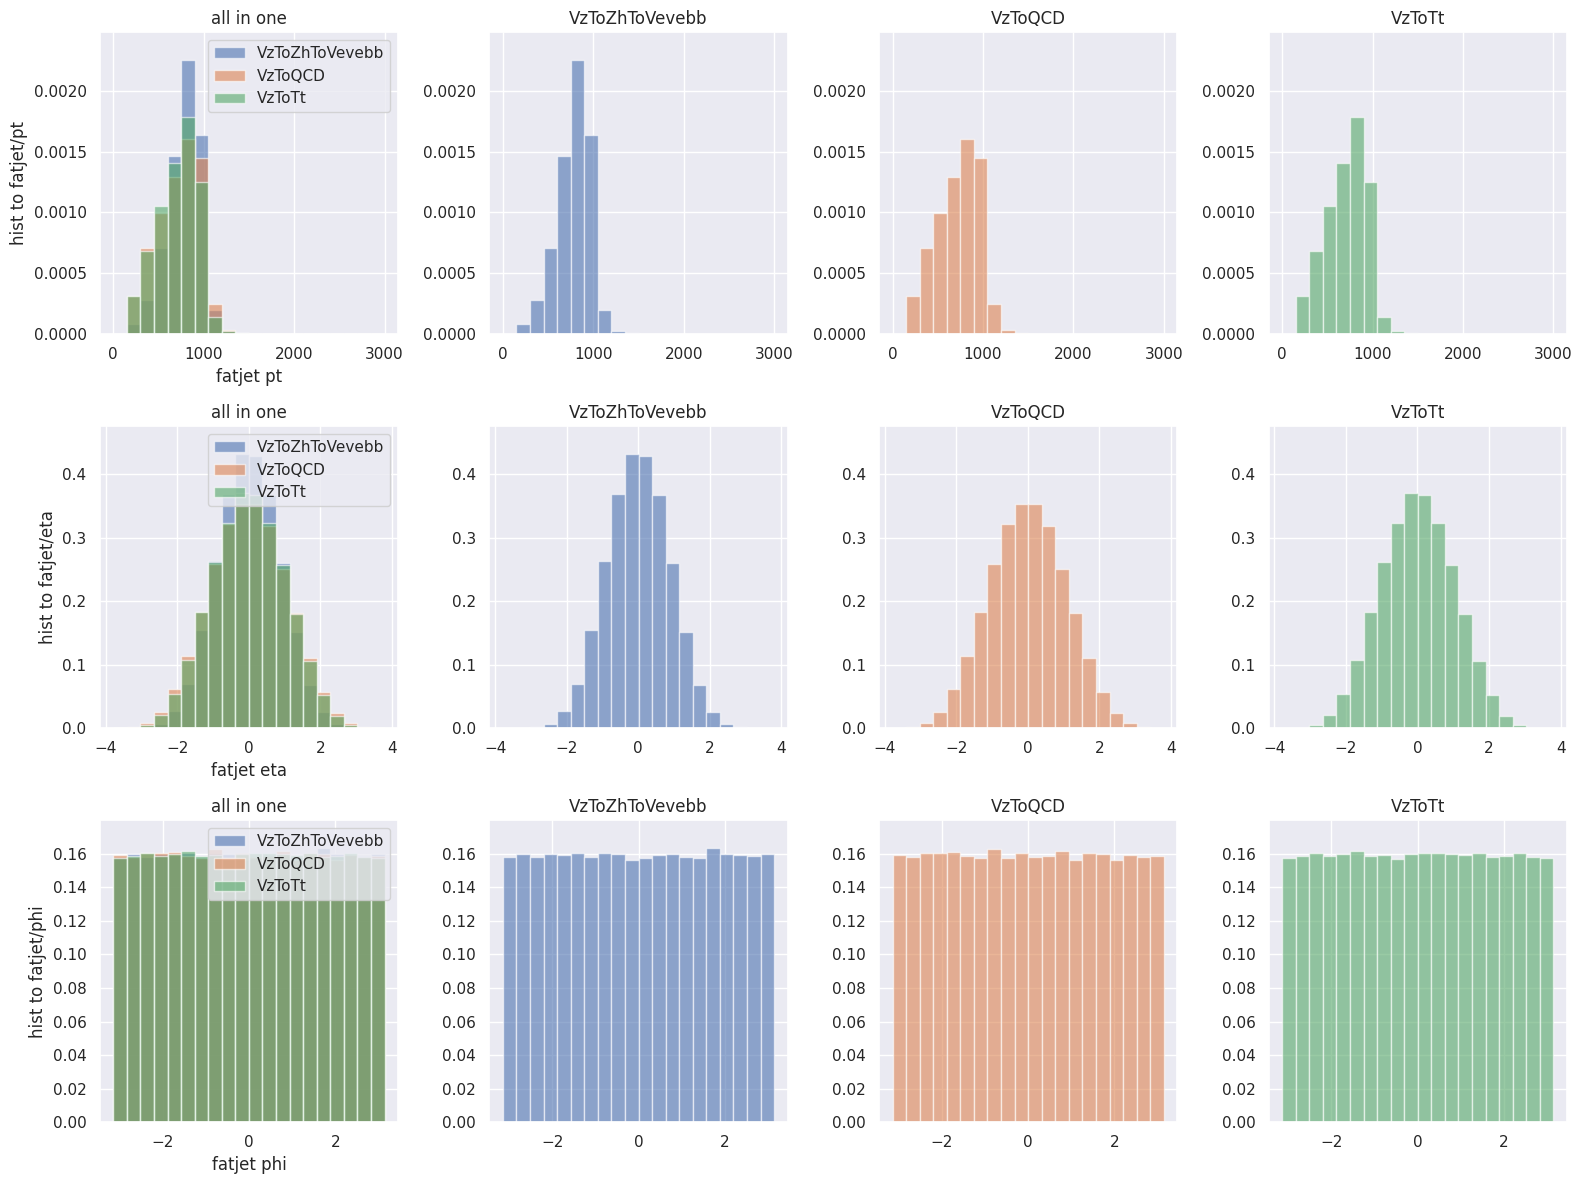

In [4]:
fig, ax = plt.subplots(3, len(channels)+1, figsize=((len(channels)+1)*4, 3*4))

def draw_jet_distribution(row_ax, feature, bins, xrange=None):
    target_events = [events.events for events in fatjet_events]
    if xrange == None:
        xrange = [
            min([ak.min(events[f"fatjet_{feature}"]) for events in target_events]),
            max([ak.max(events[f"fatjet_{feature}"]) for events in target_events]),
        ]
    yrange = [0,0]
    for i in range(len(channels)):
        events = target_events[i]
        data = ak.to_numpy(events[f"fatjet_{feature}"])
        row_ax[i+1].hist(data, bins=bins, label=channels[i], range=xrange, 
                    alpha=0.6, density=True, color=plt.rcParams['axes.prop_cycle'].by_key()['color'][i])
        pdf, _, _ = row_ax[0].hist(data, bins=bins, label=channels[i], range=xrange, 
                    alpha=0.6, density=True)
        yrange[1] = max(yrange[1], max(pdf))
    yrange[1] *= 1.1
    for i in range(len(channels)):
        row_ax[0].set_title(f"all in one")
        row_ax[0].set_xlabel(f"fatjet {feature}")
        row_ax[0].set_ylabel(f"hist to fatjet/{feature}")
        row_ax[0].set_ylim(yrange)
        row_ax[0].legend()
        row_ax[i+1].set_title(channels[i])
        row_ax[i+1].set_ylim(yrange)
        
draw_jet_distribution(ax[0], "pt", bins=20, xrange=[0, 3000])
draw_jet_distribution(ax[1], "eta", bins=20)
draw_jet_distribution(ax[2], "phi", bins=20)
plt.tight_layout()